**Steps:**

1. Importing (or installing) Tenosrflow, Keras and other packages on your system
Loading your data from disk

2. Creating your training and testing splits
Data Preprocessing

3. Defining your tensorflow ANN model architecture
4. Compiling your tensorflow ANN model
5. Training your model on your training data

6. Evaluating your model on your test data

7. Generate Plots for accuracy and validation loss
Saving The train model

8. Making predictions using your trained tensorflow model

In [1]:
!pip install tensorflow==2.0.0

In [2]:
import tensorflow as tf
print(tf.__version__)

# Import libraries and packages
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os
import time   # time1 = time.time(); print('Time taken: {:.1f} seconds'.format(time.time() - time1))
import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

warnings.filterwarnings("ignore")
SEED = 42   # set random seed

2.0.0


In [3]:
# mount google drive to collab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# change working DIR 
import os 
os.chdir("/content/drive/MyDrive/projects/Pizza Classification")

In [5]:
!dir

flagged  model_ANN.h5  Pizza\ Refund  Untitled0.ipynb


In [6]:
train = ("/content/drive/MyDrive/projects/Pizza Classification/Pizza Refund/train")
test = ("/content/drive/MyDrive/projects/Pizza Classification/Pizza Refund/test")

In [7]:
# initialize the data and labels
print("[INFO] loading images...")
time1 = time.time()   # to measure time taken
data = []
labels = []

classes = ["Burnt_pizza", "Good_pizza"]

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(train)))   # data folder with 2 categorical folders
random.seed(SEED)
random.shuffle(imagePaths)

# progress bar 
with tqdm(total=len(imagePaths)) as pbar:
    
    # loop over the input images
    for imagePath in imagePaths:
        # load the image, resize the image to be 32x32 pixels (ignoring aspect ratio), 
        # flatten the 32x32x3=3072 pixel image into a list, and store the image in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32)).flatten()
        data.append(image)

        # extract the class label from the image path and update the labels list
        label = imagePath.split(os.path.sep)[-2]
        
        label = 1 if label == "Good_pizza" else 0
        labels.append(label)
        
        # update the progressbar
        pbar.update(1)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("done")

[INFO] loading images...


  0%|          | 0/709 [00:00<?, ?it/s]

Time taken: 38.8 seconds
done


In [8]:
print("Total Images: ", len(data))

Total Images:  709


In [9]:
# sample data for first image
print("sample image: {}".format(data[0]))
print("no of features/pixels values: {}".format(len(data[0]))) # 32x32x3=3072
print("label: {}".format(classes[labels[0]]))

sample image: [0.3254902  0.25098039 0.22352941 ... 0.33333333 0.30980392 0.29019608]
no of features/pixels values: 3072
label: Good_pizza


In [10]:
# partition the data into 80% training and 20% validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=SEED)

In [11]:
print("tarin_X:", trainX.shape)
print("train_Y:",trainY.shape)
print("test_X:",testX.shape)
print("test_Y:" ,testY.shape)

tarin_X: (567, 3072)
train_Y: (567,)
test_X: (142, 3072)
test_Y: (142,)


In [12]:
type(trainY)

numpy.ndarray

In [13]:
# convert the labels from integers/categories to vectors 

trainY = to_categorical(trainY, num_classes=2)   # fit_transform = find all unique class labels + transform into one-hot encoded labels
testY = to_categorical(testY, num_classes=2)     # transform = perform the one-hot encoding (unique class labels already found)

# [0,1] good_pizza
# [1,0] burnt_pizza

In [14]:
trainY

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [15]:
sample_image = (trainX[3] * 255).astype("int")

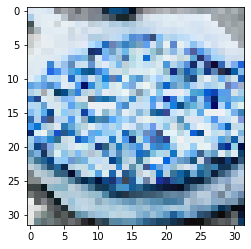

In [16]:
plt.imshow(sample_image.reshape(32,32,3))

In [37]:
# define the 3072-1024-512-1 architecture using Keras

model = Sequential()   

# input layer 3072 as there are 32x32x3=3072 pixels in a flattened input image
# first hidden layer has 1024 nodes
model.add(Dense(units= 1024, input_shape=(3072,), kernel_initializer = 'uniform', activation="relu"))  

# second hidden layer has 512 nodes
model.add(Dense(units=512, kernel_initializer='uniform', activation="relu")) 

# third hidden layer
model.add(Dense(units=256, kernel_initializer='uniform', activation="relu"))

 # output layer with number of possible class labels
model.add(Dense(units=2,kernel_initializer='uniform', activation="softmax"))    

In [38]:
# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.01
EPOCHS = 50
 
# compile the model using SGD as our optimizer and categorical cross-entropy loss
# (you'll want to use binary_crossentropy for 2-class classification)
print("[INFO] compiling network network...")
opt = SGD(lr=INIT_LR)   # Stochastic Gradient Descent (SGD) optimizer
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
print("[INFO] model compiled")

[INFO] compiling network network...
[INFO] model compiled


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 514       
Total params: 3,803,394
Trainable params: 3,803,394
Non-trainable params: 0
_________________________________________________________________


In [45]:
# train the neural network on training data set
# batch_size (32) controls the size of each group of data to pass through the network. 

time1 = time.time()   # to measure time taken
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken

Train on 567 samples, validate on 142 samples
Epoch 1/50
567/567 [==============================] - 1s 2ms/sample - loss: 0.2931 - accuracy: 0.8889 - val_loss: 0.4388 - val_accuracy: 0.7958
Epoch 2/50
567/567 [==============================] - 1s 1ms/sample - loss: 0.2625 - accuracy: 0.9136 - val_loss: 0.5554 - val_accuracy: 0.7113
Epoch 3/50
567/567 [==============================] - 1s 1ms/sample - loss: 0.2834 - accuracy: 0.8942 - val_loss: 0.4276 - val_accuracy: 0.8028
Epoch 4/50
567/567 [==============================] - 1s 1ms/sample - loss: 0.2533 - accuracy: 0.9118 - val_loss: 0.4195 - val_accuracy: 0.8028
Epoch 5/50
567/567 [==============================] - 1s 1ms/sample - loss: 0.2515 - accuracy: 0.9065 - val_loss: 1.4751 - val_accuracy: 0.5775
Epoch 6/50
567/567 [==============================] - 1s 1ms/sample - loss: 0.2689 - accuracy: 0.9101 - val_loss: 0.4436 - val_accuracy: 0.8028
Epoch 7/50
567/567 [==============================] - 1s 977us/sample - loss: 0.2430 - acc

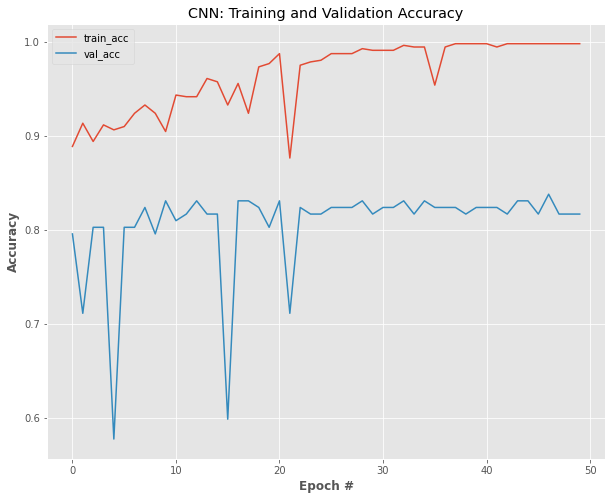

In [46]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

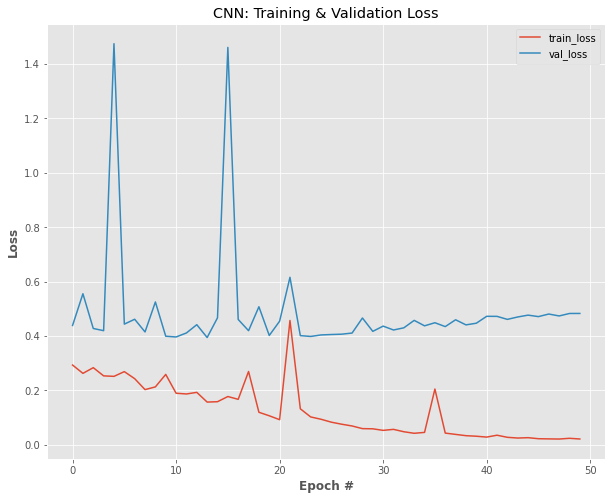

In [47]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("CNN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [24]:
# evaluate the network
print("[INFO] evaluating network...")
pred_prob = model.predict(testX, batch_size=32)

[INFO] evaluating network...


In [25]:
test_y = [ np.argmax(i)  for i in testY]
pred_y = [ np.argmax(i)  for i in pred_prob]

In [26]:
pred_y

[1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1]

In [48]:
def plot_confusion_metrix(y_true, y_pred,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    Objective
    ----------
    plot confussion matrix, classification report and accuracy score
    
    parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    classes : list
        List of labels to index the matrix
        
    title : title for matrix
    cmap : colormap for matrix 
    
    returns 
    ----------
   all accruacy matrix 
    """
    
    
    cm = confusion_matrix(y_true,y_pred)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")

    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.tight_layout()
    
    plt.show()
    
    print("-----------------------------------------------------")
    print('Classification report')
    print(classification_report(y_true,y_pred))
    
    print("-----------------------------------------------------")
    acc= accuracy_score(y_true,y_pred)
    print("Accuracy of the model: ", acc)

Confusion Matrix, Without Normalisation


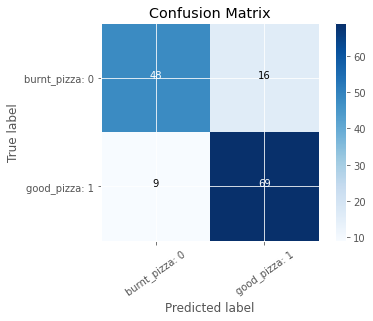

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        64
           1       0.81      0.88      0.85        78

    accuracy                           0.82       142
   macro avg       0.83      0.82      0.82       142
weighted avg       0.83      0.82      0.82       142

-----------------------------------------------------
Accuracy of the model:  0.823943661971831


In [49]:
plot_confusion_metrix(test_y, pred_y,classes=["burnt_pizza: 0","good_pizza: 1"])

In [50]:
# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save('model_ANN.h5')

[INFO] serializing network and label binarizer...


In [51]:
# import the necessary packages
from tensorflow.keras.models import load_model
import pickle
import cv2
import imutils
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid(b=None)
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [53]:
# load the input image and resize it to the target spatial dimensions
width = 32
height = 32

# grab the image paths and randomly shuffle them
testImagePaths = sorted(list(paths.list_images(test)))   # test data folder with random images


# progress bar 
with tqdm(total=len(testImagePaths)) as pbar:
    
    for imagePath in testImagePaths:
        image = cv2.imread(imagePath)
        output = image.copy()
        image = cv2.resize(image, (width, height))

        # scale the pixel values to [0, 1]
        image = image.astype("float") / 255.0

        # for a simple fully-connected network, flatten the image
        image = image.flatten()
        image = image.reshape((1, image.shape[0]))


        # make a prediction on the image
        preds = model.predict(image)

        # find the class label index with the largest corresponding probability
        i = preds.argmax(axis=1)[0]
        label = classes[i]
        
        label = "{}: {:.2f}%".format(label, preds[0][i] * 100)

        
        output = imutils.resize(output, width=400)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (0, 255, 0), 2)
        
        # convert img to rgb format and display in noteboo
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)

#         print("############################")
#         print("image: {}".format(os.path.split(imagePath)[-1]))
#         print("predicted label: {}".format(label))
#         print("Confidence: {}".format(preds[0][i]))
        
        pbar.update(1)

Output hidden; open in https://colab.research.google.com to view.

In [54]:
!pip install gradio
import gradio as gr

In [55]:
def predict_image(image):
    
    image = cv2.resize(image, (32, 32))

    # scale the pixel values to [0, 1]
    image = image.astype("float") / 255.0

    # for a simple fully-connected network, flatten the image
    image = image.flatten()
    image = image.reshape((1, image.shape[0]))

    # make a prediction on the image
    preds = model.predict(image).flatten()
    result = dict()
    result["burnt_pizza"] = round(float(list(preds)[0]), 3)
    result["good_pizza"] = round(float(list(preds)[1]), 3)
    print(result)
    
    return result

im = gr.inputs.Image(shape=(32,32))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=im, outputs=label, capture_session=True, title="Pizza Classification").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://59423.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f8d0104aad0>,
 'http://127.0.0.1:7862/',
 'https://59423.gradio.app')

**Conclusion**

As we are using ANN model for image classification, it may not give better accuracy because ANN is much suited for structure data and not unstructure data.

For better accuracy we must use CNN model becuse it  does feature scaling for each pixel and weights of each pixels are are extracted by CONV => RELU => POOLING => DENSE

IN CNN we only apply dense layer flattening the image pixels to array